In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/Administrator/Desktop/bharat itern/TSLA.csv')

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,TSLA,2018-01-10 00:00:00+00:00,334.80,337.00,330.00,332.20,4236168,22.320000,22.466667,22.000000,22.146667,63542520,0.0,1.0
1,1,TSLA,2018-01-11 00:00:00+00:00,337.95,344.81,333.26,335.24,6619082,22.530000,22.987333,22.217333,22.349333,99286230,0.0,1.0
2,2,TSLA,2018-01-12 00:00:00+00:00,336.22,340.41,333.67,338.63,4805025,22.414667,22.694000,22.244667,22.575333,72075375,0.0,1.0
3,3,TSLA,2018-01-16 00:00:00+00:00,340.06,345.00,334.80,337.54,6392397,22.670667,23.000000,22.320000,22.502667,95885955,0.0,1.0
4,4,TSLA,2018-01-17 00:00:00+00:00,347.16,349.00,339.75,340.47,7062337,23.144000,23.266667,22.650000,22.698000,105935055,0.0,1.0


In [4]:
df.shape

(1257, 15)

In [5]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,1252,TSLA,2022-12-30 00:00:00+00:00,123.18,124.48,119.7500,119.95,157777339,123.18,124.48,119.7500,119.95,157777339,0.0,1.0
1253,1253,TSLA,2023-01-03 00:00:00+00:00,108.10,118.80,104.6400,118.47,231402818,108.10,118.80,104.6400,118.47,231402818,0.0,1.0
1254,1254,TSLA,2023-01-04 00:00:00+00:00,113.64,114.59,107.5200,109.11,180388976,113.64,114.59,107.5200,109.11,180388976,0.0,1.0
1255,1255,TSLA,2023-01-05 00:00:00+00:00,110.34,111.75,107.1601,110.51,157986324,110.34,111.75,107.1601,110.51,157986324,0.0,1.0
1256,1256,TSLA,2023-01-06 00:00:00+00:00,113.06,114.39,101.8100,103.00,220911051,113.06,114.39,101.8100,103.00,220911051,0.0,1.0


In [6]:
df1=df.reset_index()['close']

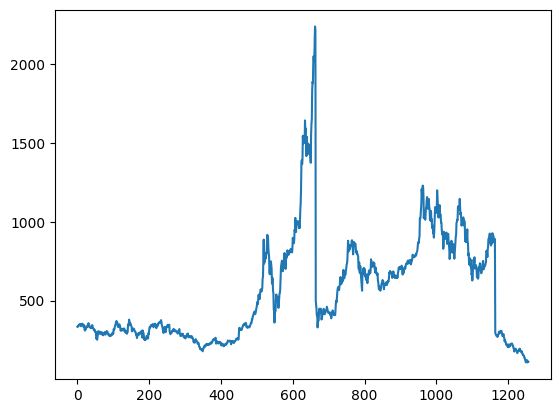

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [9]:
import numpy as np

In [10]:
df1

0       334.80
1       337.95
2       336.22
3       340.06
4       347.16
         ...  
1252    123.18
1253    108.10
1254    113.64
1255    110.34
1256    113.06
Name: close, Length: 1257, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.10639946]
 [0.10787788]
 [0.10706592]
 ...
 [0.00260015]
 [0.00105132]
 [0.00232793]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(817, 440)

In [15]:
train_data

array([[0.10639946],
       [0.10787788],
       [0.10706592],
       [0.10886819],
       [0.1122005 ],
       [0.11098491],
       [0.11354282],
       [0.1142656 ],
       [0.11484289],
       [0.11160444],
       [0.10773238],
       [0.11017765],
       [0.11331284],
       [0.11157159],
       [0.11555629],
       [0.11318142],
       [0.11060005],
       [0.10561566],
       [0.1060099 ],
       [0.11118673],
       [0.09721447],
       [0.09495694],
       [0.09744914],
       [0.101171  ],
       [0.10053739],
       [0.10605684],
       [0.1067233 ],
       [0.10638538],
       [0.10569545],
       [0.11173586],
       [0.11449558],
       [0.11701593],
       [0.11399808],
       [0.11027621],
       [0.10458311],
       [0.10654964],
       [0.10571891],
       [0.10330181],
       [0.1052261 ],
       [0.10372422],
       [0.10281839],
       [0.11142609],
       [0.10970361],
       [0.10256494],
       [0.10208152],
       [0.10008683],
       [0.09643067],
       [0.095

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 15s 395ms/step - loss: 0.0228 - val_loss: 0.0072
Epoch 2/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0098 - val_loss: 0.0060
Epoch 3/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0076 - val_loss: 0.0038
Epoch 4/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0069 - val_loss: 0.0039
Epoch 5/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0068 - val_loss: 0.0041
Epoch 6/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0056 - val_loss: 0.0027
Epoch 7/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0053 - val_loss: 0.0025
Epoch 8/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0058 - val_loss: 0.0023
Epoch 9/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 10/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0050 - val_l

12/12 [==============================] - 2s 190ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 82/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 83/100
12/12 [==============================] - 2s 191ms/step - loss: 9.9303e-04 - val_loss: 0.0011
Epoch 84/100
12/12 [==============================] - 3s 253ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 85/100
12/12 [==============================] - 3s 261ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 86/100
12/12 [==============================] - 3s 269ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 87/100
12/12 [==============================] - 3s 232ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 88/100
12/12 [==============================] - 5s 432ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 89/100
12/12 [==============================] - 4s 295ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 90/100
12/12 [==============================] - 3s 238ms/step - loss: 0.0022 - val_lo

In [32]:
import tensorflow as tf

In [25]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 37ms/step


In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

642.2457192678503

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

829.7671804771643

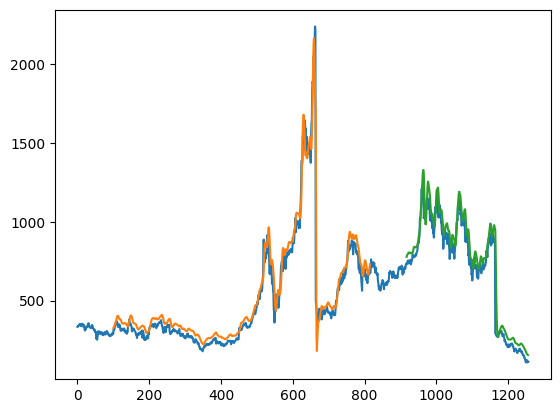

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

440

In [31]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
temp_input

[0.3809119282847957,
 0.37729800765024757,
 0.37571163729378354,
 0.3669772135263887,
 0.35746837819444766,
 0.36667683570741316,
 0.36758266256776095,
 0.0882219041137681,
 0.0844765681834182,
 0.08294182526459062,
 0.07960012202848896,
 0.07861920071339731,
 0.07934667824372846,
 0.0760847628657921,
 0.07806068570623989,
 0.08241616408138361,
 0.08502569638373267,
 0.08991622274892638,
 0.09214089597071318,
 0.08637270316570062,
 0.09129138995142327,
 0.09182643794147327,
 0.09163870180461361,
 0.09432332856170653,
 0.09416375284537584,
 0.0904418839321334,
 0.08471123835449273,
 0.07848778541759557,
 0.07880693685025697,
 0.08205946542135029,
 0.08434515288761646,
 0.0751460821814939,
 0.07375683476873254,
 0.0630324079506254,
 0.06633656395935512,
 0.06228615680660832,
 0.061028324689648694,
 0.05396005913688311,
 0.05390843169924671,
 0.050876493088963456,
 0.05122380494215381,
 0.05332644967498182,
 0.04547438575082721,
 0.05221411306408842,
 0.05260835895149367,
 0.0534766385844

In [34]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<50):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.02122342]
101
1 day input [0.37729801 0.37571164 0.36697721 0.35746838 0.36667684 0.36758266
 0.0882219  0.08447657 0.08294183 0.07960012 0.0786192  0.07934668
 0.07608476 0.07806069 0.08241616 0.0850257  0.08991622 0.0921409
 0.0863727  0.09129139 0.09182644 0.0916387  0.09432333 0.09416375
 0.09044188 0.08471124 0.07848779 0.07880694 0.08205947 0.08434515
 0.07514608 0.07375683 0.06303241 0.06633656 0.06228616 0.06102832
 0.05396006 0.05390843 0.05087649 0.0512238  0.05332645 0.04547439
 0.05221411 0.05260836 0.05347664 0.04654918 0.04990965 0.04841246
 0.05365264 0.05469692 0.05490813 0.05651796 0.05605801 0.05618943
 0.0501631  0.05031798 0.04663835 0.0417619  0.03904912 0.03261446
 0.0387769  0.04124094 0.03888485 0.04051346 0.03699341 0.03523338
 0.03383475 0.02805247 0.02900993 0.03524746 0.03508788 0.03511604
 0.03413512 0.04064487 0.04064487 0.04071997 0.03489545 0.03366109
 0.0309483  0.0306667  0.0332997  0.02802901 0.02480464 0.02285687
 0.0232652  0.01977331 0.01960435 

9 day output [[0.05995384]]
10 day input [0.07960012 0.0786192  0.07934668 0.07608476 0.07806069 0.08241616
 0.0850257  0.08991622 0.0921409  0.0863727  0.09129139 0.09182644
 0.0916387  0.09432333 0.09416375 0.09044188 0.08471124 0.07848779
 0.07880694 0.08205947 0.08434515 0.07514608 0.07375683 0.06303241
 0.06633656 0.06228616 0.06102832 0.05396006 0.05390843 0.05087649
 0.0512238  0.05332645 0.04547439 0.05221411 0.05260836 0.05347664
 0.04654918 0.04990965 0.04841246 0.05365264 0.05469692 0.05490813
 0.05651796 0.05605801 0.05618943 0.0501631  0.05031798 0.04663835
 0.0417619  0.03904912 0.03261446 0.0387769  0.04124094 0.03888485
 0.04051346 0.03699341 0.03523338 0.03383475 0.02805247 0.02900993
 0.03524746 0.03508788 0.03511604 0.03413512 0.04064487 0.04064487
 0.04071997 0.03489545 0.03366109 0.0309483  0.0306667  0.0332997
 0.02802901 0.02480464 0.02285687 0.0232652  0.01977331 0.01960435
 0.01393941 0.01383146 0.00809612 0.00706357 0.00046934 0.00216366
 0.00643935 0.00707765

17 day output [[0.105472]]
18 day input [0.0921409  0.0863727  0.09129139 0.09182644 0.0916387  0.09432333
 0.09416375 0.09044188 0.08471124 0.07848779 0.07880694 0.08205947
 0.08434515 0.07514608 0.07375683 0.06303241 0.06633656 0.06228616
 0.06102832 0.05396006 0.05390843 0.05087649 0.0512238  0.05332645
 0.04547439 0.05221411 0.05260836 0.05347664 0.04654918 0.04990965
 0.04841246 0.05365264 0.05469692 0.05490813 0.05651796 0.05605801
 0.05618943 0.0501631  0.05031798 0.04663835 0.0417619  0.03904912
 0.03261446 0.0387769  0.04124094 0.03888485 0.04051346 0.03699341
 0.03523338 0.03383475 0.02805247 0.02900993 0.03524746 0.03508788
 0.03511604 0.03413512 0.04064487 0.04064487 0.04071997 0.03489545
 0.03366109 0.0309483  0.0306667  0.0332997  0.02802901 0.02480464
 0.02285687 0.0232652  0.01977331 0.01960435 0.01393941 0.01383146
 0.00809612 0.00706357 0.00046934 0.00216366 0.00643935 0.00707765
 0.         0.00260015 0.00105132 0.00232793 0.02122342 0.02249442
 0.02540533 0.02942294

25 day output [[0.15761207]]
26 day input [0.08471124 0.07848779 0.07880694 0.08205947 0.08434515 0.07514608
 0.07375683 0.06303241 0.06633656 0.06228616 0.06102832 0.05396006
 0.05390843 0.05087649 0.0512238  0.05332645 0.04547439 0.05221411
 0.05260836 0.05347664 0.04654918 0.04990965 0.04841246 0.05365264
 0.05469692 0.05490813 0.05651796 0.05605801 0.05618943 0.0501631
 0.05031798 0.04663835 0.0417619  0.03904912 0.03261446 0.0387769
 0.04124094 0.03888485 0.04051346 0.03699341 0.03523338 0.03383475
 0.02805247 0.02900993 0.03524746 0.03508788 0.03511604 0.03413512
 0.04064487 0.04064487 0.04071997 0.03489545 0.03366109 0.0309483
 0.0306667  0.0332997  0.02802901 0.02480464 0.02285687 0.0232652
 0.01977331 0.01960435 0.01393941 0.01383146 0.00809612 0.00706357
 0.00046934 0.00216366 0.00643935 0.00707765 0.         0.00260015
 0.00105132 0.00232793 0.02122342 0.02249442 0.02540533 0.02942294
 0.03406612 0.03902612 0.04414222 0.04934634 0.05461743 0.05995384
 0.06535973 0.07083978 0

35 day output [[0.23875336]]
36 day input [0.06102832 0.05396006 0.05390843 0.05087649 0.0512238  0.05332645
 0.04547439 0.05221411 0.05260836 0.05347664 0.04654918 0.04990965
 0.04841246 0.05365264 0.05469692 0.05490813 0.05651796 0.05605801
 0.05618943 0.0501631  0.05031798 0.04663835 0.0417619  0.03904912
 0.03261446 0.0387769  0.04124094 0.03888485 0.04051346 0.03699341
 0.03523338 0.03383475 0.02805247 0.02900993 0.03524746 0.03508788
 0.03511604 0.03413512 0.04064487 0.04064487 0.04071997 0.03489545
 0.03366109 0.0309483  0.0306667  0.0332997  0.02802901 0.02480464
 0.02285687 0.0232652  0.01977331 0.01960435 0.01393941 0.01383146
 0.00809612 0.00706357 0.00046934 0.00216366 0.00643935 0.00707765
 0.         0.00260015 0.00105132 0.00232793 0.02122342 0.02249442
 0.02540533 0.02942294 0.03406612 0.03902612 0.04414222 0.04934634
 0.05461743 0.05995384 0.06535973 0.07083978 0.07639784 0.08203712
 0.08776068 0.09357177 0.09947412 0.105472   0.11157025 0.1177744
 0.12409054 0.1305254

45 day output [[0.35504183]]
46 day input [0.04654918 0.04990965 0.04841246 0.05365264 0.05469692 0.05490813
 0.05651796 0.05605801 0.05618943 0.0501631  0.05031798 0.04663835
 0.0417619  0.03904912 0.03261446 0.0387769  0.04124094 0.03888485
 0.04051346 0.03699341 0.03523338 0.03383475 0.02805247 0.02900993
 0.03524746 0.03508788 0.03511604 0.03413512 0.04064487 0.04064487
 0.04071997 0.03489545 0.03366109 0.0309483  0.0306667  0.0332997
 0.02802901 0.02480464 0.02285687 0.0232652  0.01977331 0.01960435
 0.01393941 0.01383146 0.00809612 0.00706357 0.00046934 0.00216366
 0.00643935 0.00707765 0.         0.00260015 0.00105132 0.00232793
 0.02122342 0.02249442 0.02540533 0.02942294 0.03406612 0.03902612
 0.04414222 0.04934634 0.05461743 0.05995384 0.06535973 0.07083978
 0.07639784 0.08203712 0.08776068 0.09357177 0.09947412 0.105472
 0.11157025 0.1177744  0.12409054 0.13052544 0.13708653 0.14378197
 0.15062056 0.15761207 0.16476695 0.1720966  0.1796134  0.18733074
 0.19526315 0.20342639 

In [35]:
day_new=np.arange(1,101)
day_pred=np.arange(101,151)

In [36]:
import matplotlib.pyplot as plt

In [37]:
len(df1)

1257

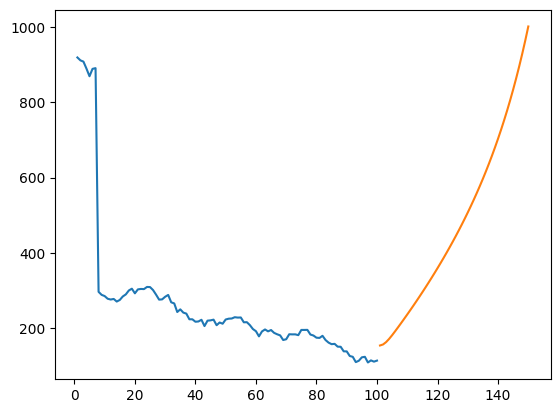

In [38]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

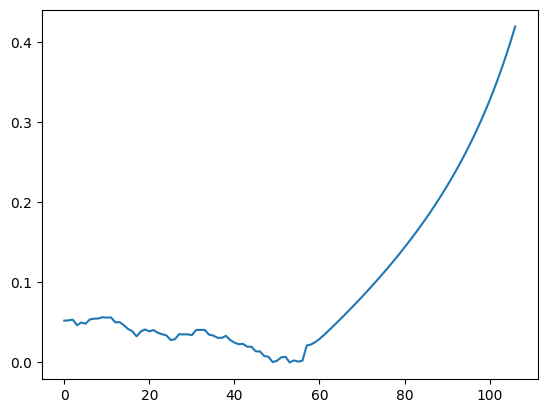

In [39]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [40]:
df3=scaler.inverse_transform(df3).tolist()

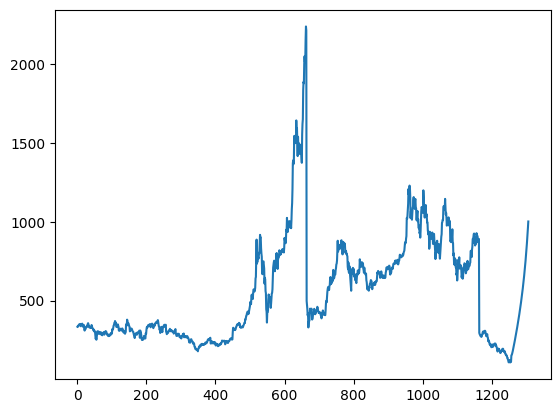

In [41]:
plt.plot(df3)